# CUSTOMER CHURN PREDICTION



## Business Problem:

Banking is one of those traditional industries that has gone through a steady transformation over the decades. Yet, many banks 

today with a sizeable customer base hoping to gain a competitive edge have not tapped into the vast amounts of data they have, 

especially in solving one of the most acknowledged problems – customer churn.

There is a Bank who wants to retain their existing customers who may churn, for that they have to know which existing customers 

has the highest probability of leaving the company and which customers have lowest probability of leaving the company.


Churning of customers is a big problem for banks, they want to maximise the retention of the customers so that they can plan 

their future projects.

Also if a Bank wants to get a funding from big investors, Rate of churning plays an important role.

So Bank wants to build a Machine Learning model which can predict whether a particular customer will churn or not.

## Data:

We have 10000 rows with 13 features and 1 target variable, Every row tells us different customer details and whether they have churned or not.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings("ignore")

In [10]:
df= pd.read_csv("Churn_Modelling.csv")

In [11]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [12]:
df.shape

(10000, 14)

In [13]:
# Checking whether there are null vaues.
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Observation:

There are no null values in our data.

In [14]:
duplicate=df[df.duplicated()]
duplicate.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


### Observation:

There are no duplicate values in our data.








In [15]:
df['Exited'].value_counts()
#1= will churn
#0= will not churn

0    7963
1    2037
Name: Exited, dtype: int64

### Observation:
    
0 means those customers who have continued.

1 means those customers who have discontinued.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


### Observation:
    
From Columns we can observe, there is 1 class label(y) i.e. "Exited" and 13 features(x).
    
'RowNumber', 'CustomerId', 'Surname' columns are useless in analysing this data.
    
So we will divide this data in Numerical and Categorical features. using this two features for next data analysis.

In [18]:
# Dividing data into Numerical features and Categorical features.
df_numerical=df[['CreditScore','Age','Balance','EstimatedSalary','Exited']]
df_catagorical= df[['Geography','Gender','NumOfProducts', 'HasCrCard',
       'IsActiveMember','Tenure','Exited']]

df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0
...,...,...,...,...,...
9995,771,39,0.00,96270.64,0
9996,516,35,57369.61,101699.77,0
9997,709,36,0.00,42085.58,1
9998,772,42,75075.31,92888.52,1


In [19]:
df_catagorical

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Tenure,Exited
0,France,Female,1,1,1,2,1
1,Spain,Female,1,0,1,1,0
2,France,Female,3,1,0,8,1
3,France,Female,2,0,0,1,0
4,Spain,Female,1,1,1,2,0
...,...,...,...,...,...,...,...
9995,France,Male,2,1,0,5,0
9996,France,Male,1,1,1,10,0
9997,France,Female,1,0,1,7,1
9998,Germany,Male,2,1,0,3,1


In [20]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# EDA(Exploratory Data Analysis)

Exploratory data analysis will provide us more insights of a data.Exploratory Data Analysis is an approach in analyzing data 

sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

EDA assists Data science professionals in various ways:-

1 Getting a better understanding of data

2 Identifying various data patterns

3 Getting a better understanding of the problem statement In EDA 

we will visualise every feature to understand its relation with class label i.e. "Exited".Here we will do EDA separately on

numerical and categorical features.

### We are going to do two types of analysis

### 1) Univariate 

Uni means one and variate means variable, so in univariate analysis, there is only one dependable variable. The objective of 

univariate analysis is to derive the data, define and summarize it, and analyze the pattern present in it. In a dataset, it 

explores each variable separately. It is possible for two kinds of variables- Categorical and Numerical.

### 2) Bivariate

Multivariate analysis is required when more than two variables have to be analyzed simultaneously. It is a tremendously hard 

task for the human brain to visualize a relationship among 4 variables in a graph and thus multivariate analysis is used to 

study more complex sets of data. Types of Multivariate Analysis include Cluster Analysis, Factor Analysis, Multiple Regression

Analysis, Principal Component Analysis, etc. More than 20 different ways to perform multivariate analysis exist and which one

to choose depends upon the type of data and the end goal to achieve. 

# EDA on Numerical features:

# UNIVARIATE EDA

## 1. CreditScore

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

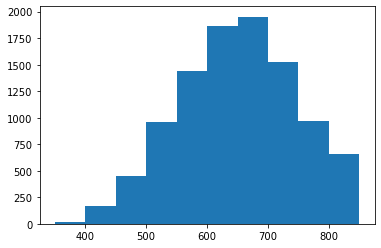

In [21]:
plt.hist(df['CreditScore'])

### Observation:

Credit score histogram is giving us a hint to normal distributed curve, means most of the people have credit score betweeen 600

to 700 There are less people which have credit score more than 800 and which have credit score less than 500.

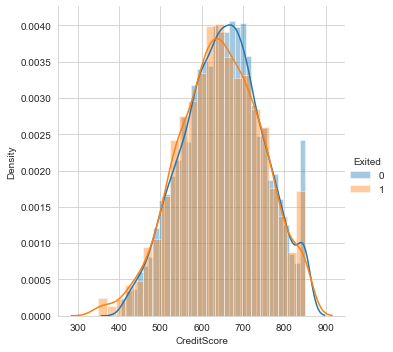

In [22]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot,"CreditScore")\
   .add_legend();
plt.show();

### Observation:
    
PDF of CreditScore is not helping us to differentiate between customers who have stayed and left.

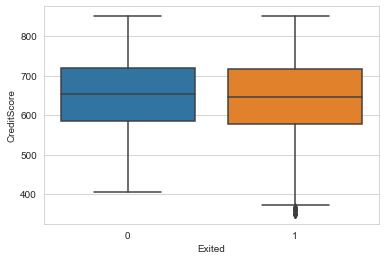

In [23]:
sns.boxplot(x='Exited',y='CreditScore', data=df)
plt.show()

### Observation:

Observation:
Box plot of CreditScore is not helping us to differentiate between customers who have stayed and left. But we can say that

1) 75% Customers have Credit Score less than 710-720

2) 50% Customers have Credit Score less than 650-670

3) 25% customers have Credit Score less than 570-590

As per whiskers, customers who have left, have credit Score below 400. Most stable customer who have credit score 590-720.


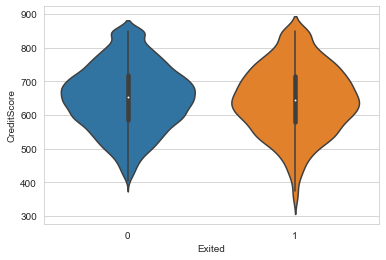

In [24]:
sns.violinplot(x="Exited", y="CreditScore", data=df, size=8)
plt.show()

### Observation:

Violin Plot is combination of Box Plot and PDF.

Here violin plot is not helping in analysing data.

## 2. Age

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

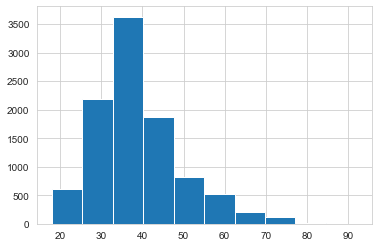

In [25]:
plt.hist(df['Age'])

### Observation:

Age histogram is giving us hint that distribution is Right skewed distrubation curve.

By observing this plot we can say that most of the customers have Age between 30-40

There are very less customers above age of 50.

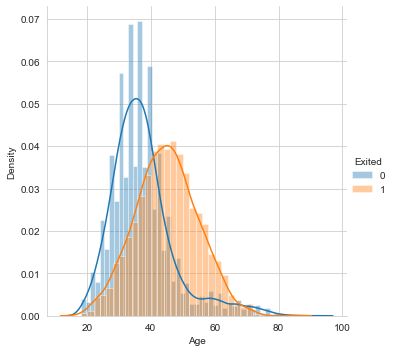

In [26]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot,"Age")\
   .add_legend();
plt.show();

### Observation:

PDF of Age is showing us that customers between age group of 30 to 40 are tend to stay.

Between age of 40 to 50 there are high chances of customers have left.

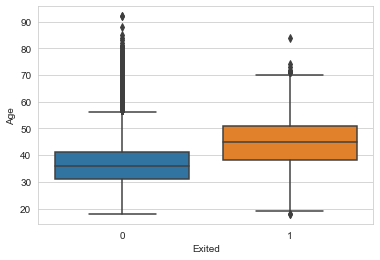

In [27]:
sns.boxplot(x='Exited',y='Age', data=df)
plt.show()

### Observation:

As we can see IQR of Customers who stayed and who left are overplapping around age range between 39 to 41. it indication that the two groups have reasonably similar values ,the box plot not much usefull.

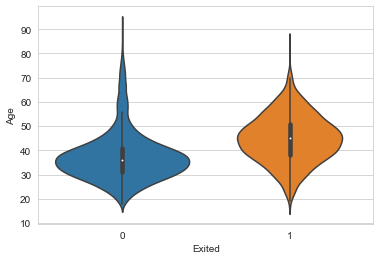

In [28]:
sns.violinplot(x="Exited", y="Age", data=df, size=8)
plt.show()

### Observation:

Violin Plot is combination of Box Plot and PDF.

Here violin plot is not helping in analysing data.

## 3. Balance

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

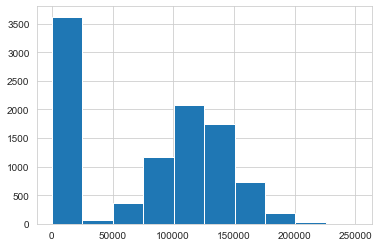

In [29]:
plt.hist(df['Balance'])

### Observation:

From Histogram we can observe that around 3600 customers have 0 balance,then 2000 customer who have balance 125000.

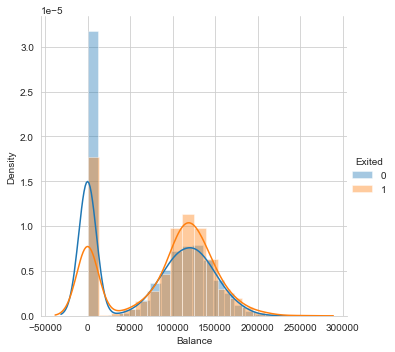

In [30]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot,"Balance")\
   .add_legend();
plt.show();

### Observation:

A distplot plots a univariate distribution of observations ,Majority of Customers have 0 balance. 
 
Though they have 0 balance, majority of them have stayed with the bank.

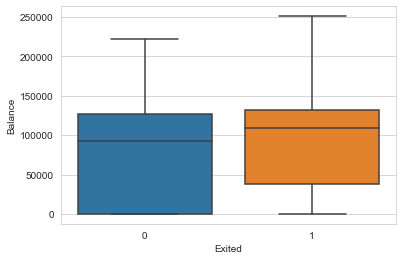

In [31]:
sns.boxplot(x='Exited',y='Balance', data=df)
plt.show()

### Observation:

Here we can observe that customer having balance less than 50000 are likely to stay with the bank.

Here the Median line of the plot B lies between Q2-Q3 the box of Plot A.

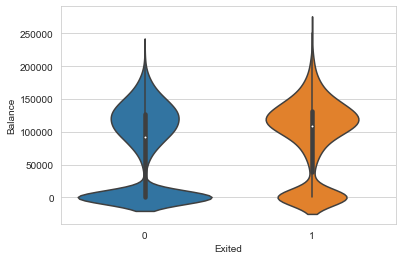

In [32]:
sns.violinplot(x="Exited", y="Balance", data=df, size=8)
plt.show()

### Observation:
A large number of customers who have 0 balance are likely to stay with bank.

## 4. EstimatedSalary

(array([ 987.,  968., 1006., 1027., 1002., 1027., 1007.,  982., 1009.,
         985.]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <BarContainer object of 10 artists>)

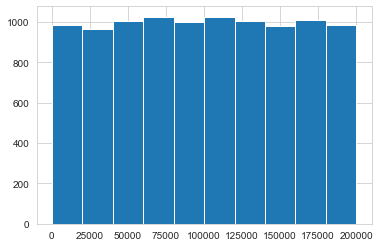

In [33]:
plt.hist(df['EstimatedSalary'])

### Observation:
We can see from histogram, there is not much difference in customers from different salary range.

Hence Histogram of EstimatedSalary is not useful for analysing data.both group values are likely same to other.

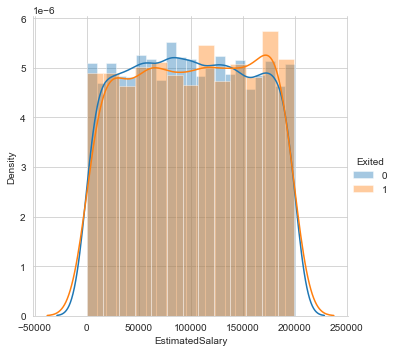

In [34]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot,'EstimatedSalary')\
   .add_legend();
plt.show();

### Observation:

 PDF of EstimatedSalary is also not much useful for this data analysis .

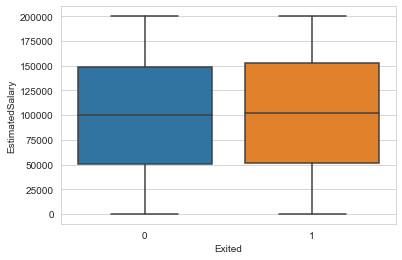

In [35]:
sns.boxplot(x='Exited',y='EstimatedSalary',data=df)
plt.show()

### Observation:
 There is no difference in box plot of stayed and exited Both belong to same salary range. 

   Hence Box plot is not hepful in data this analysis.

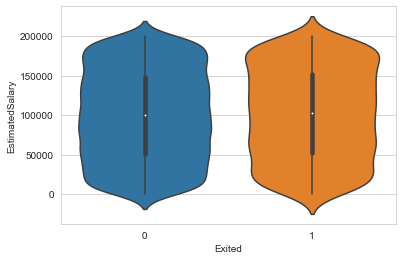

In [36]:
sns.violinplot(x="Exited", y="EstimatedSalary", data=df, size=8)
plt.show()

### Observation:
 Even the Violin Plot of  EstimatedSalary is not helpful in this data analysis.






# BIVARIATE EDA

## 1 Pair-Plot

We will begin with Pair Plot to observe what is happening inside our numerical features.

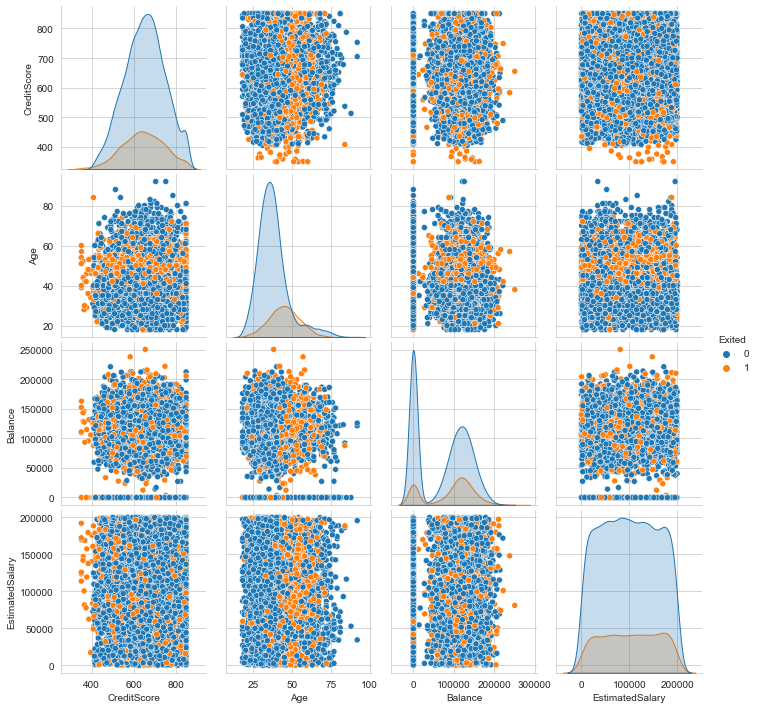

In [37]:
sns.pairplot(df_numerical,hue='Exited')

### Observation:
 We can Observe some pattern formation between Age and EstimatedSalary.

 We can also oserve pattern formation between Age and CreditScore.

## 2. Scatter plot using Age and CreditScore

A scatter plot represents individual pieces of data using dots

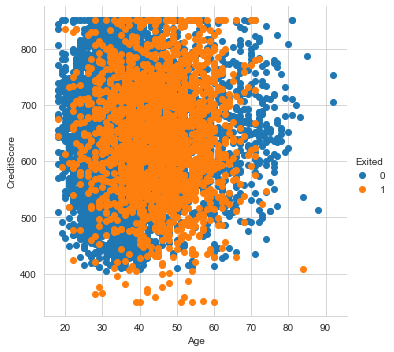

In [38]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(plt.scatter, "Age", "CreditScore")\
   .add_legend();
plt.show();

### Observation:
 We can see there is circular area in approximately middle of scatter plot which indicate customers who have left.

## 3. Scatter plot using Age and EstimatedSalary

A scatter plot represents individual pieces of data using dots.

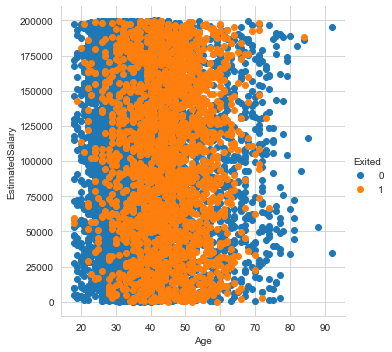

In [39]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(plt.scatter, "Age", "EstimatedSalary" )\
   .add_legend();
plt.show();

### Observation:
 We can oserve from scatter plot of Age and EstimatedSalary that customers from age group below 30 and above 60 are likely to stay with the bank.

# EDA for Categorical features.

## 1) For NumOfProducts

In [40]:
import warnings
warnings.filterwarnings("ignore")
a=df_catagorical['NumOfProducts'].value_counts()
a

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<AxesSubplot:>

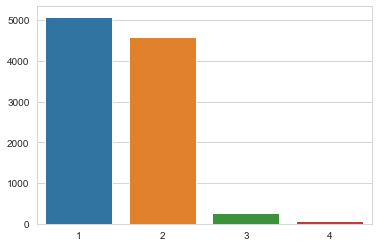

In [41]:
sns.barplot(x=a.index,y=a.values)

### Observation:
 5084 customers have bought only one product from bank.

 4590 customers have bought 2 products from bank.

 266 customers have bought 3 products from bank.

 Only 60 Customers have bought 4 products from bank.

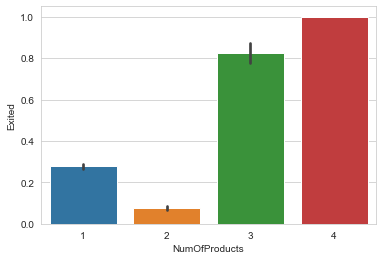

In [42]:
sns.barplot(x='NumOfProducts', y='Exited', data=df_catagorical)
plt.show()

### Observation:
 Customers who have bought 2 products have shown least Exits.

 Customers who have bought 3 or 4 products have shown highest Exits..

(-1.1059349205019084,
 1.1002826158397652,
 -1.116497450906123,
 1.1041122438861788)

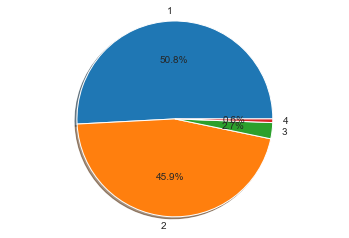

In [43]:
labels=a.index
sizes=a.values

plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')

### Observation:
 There are 50.8% customers who have bought only one product.
    
 There are 45.9% customers who have bought 2 products.

 The 2.7% customers have bought 3 products and only 0.6% customers have bought 4 products.

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

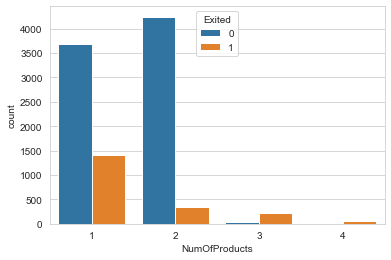

In [44]:
sns.countplot(data=df_catagorical, x='NumOfProducts', hue='Exited')

### Observation: 
 Customers who have bought 2 products from bank are more likely to continue with same bank.

 customers who have bought 3 or 4 products have Exited.

## 2) For Geography
   Here we are studying customer distribution across 3 countries

In [45]:
import warnings
warnings.filterwarnings("ignore")
b=df_catagorical['Geography'].value_counts()
b

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:>

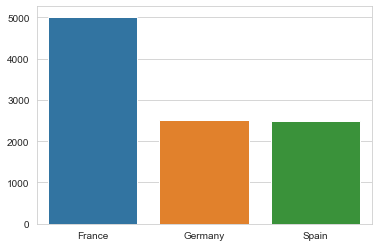

In [46]:
sns.barplot(x=b.index,y=b.values)

### Observation: 

 There are more number of customers in France(5014) as compared to Germany(2509) and Spain(2477).

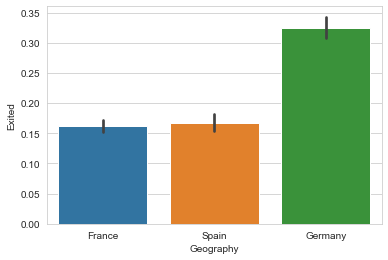

In [47]:
sns.barplot(x='Geography', y='Exited', data=df_catagorical)
plt.show()

### Observation:
 More number of customers from Germany(33%) have Exited as compared to France(16.5%) and Spain(16%).

(-1.1011756716174903,
 1.1000559843627375,
 -1.101918599067293,
 1.1006880031680237)

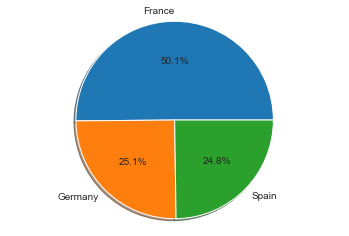

In [48]:
labels=b.index
sizes=b.values

plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')

### Observation: 

 50.1% customers belong to France, 25.1% customers belong to Germany and 24.8% customers are from Spain.

<AxesSubplot:xlabel='Geography', ylabel='count'>

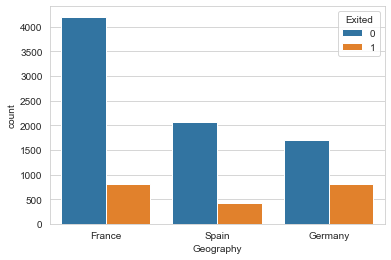

In [49]:
sns.countplot(data=df_catagorical, x='Geography', hue='Exited')

### Observation: 
 More Churning is seen in Customers from Germany than Spain and France

## 3) For Gender

In [50]:
import warnings
warnings.filterwarnings("ignore")
c=df_catagorical['Gender'].value_counts()
c

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:>

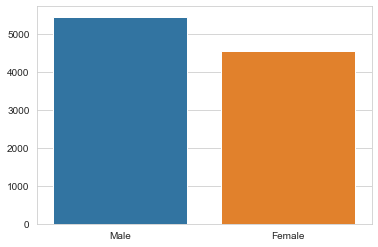

In [51]:
sns.barplot(x=c.index,y=c.values)

### Observation:
 More number of male customers(5457) than female(4543) customers.

(-1.1107416681807245,
 1.1005115080086059,
 -1.1258189261495668,
 1.1119466189728702)

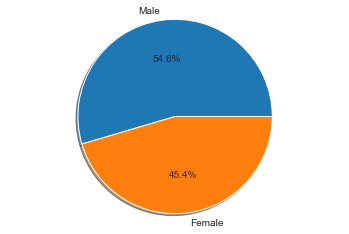

In [52]:
labels=c.index
sizes=c.values

plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')

### Observation:
Out of 100 % ,54.6% customers are males and 45.4% customers are females.

<AxesSubplot:xlabel='Gender', ylabel='count'>

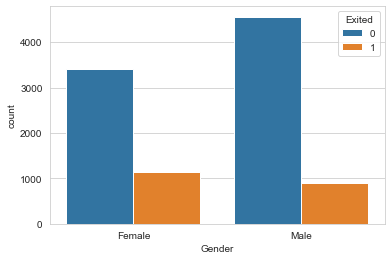

In [53]:
sns.countplot(data=df_catagorical, x='Gender', hue='Exited')

### Observation: 
 Male customers are more loyal than female customers.

## 4) For Tenure

In [54]:
import warnings
warnings.filterwarnings("ignore")
d=df_catagorical['Tenure'].value_counts()
d

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

### Observation:

 Here we can see that there are 11 different tenures from 0 to 10 years.

<AxesSubplot:>

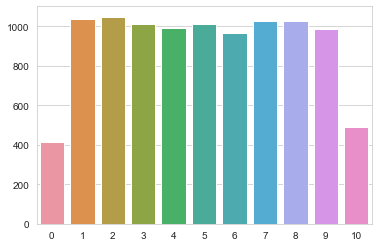

In [55]:
sns.barplot(x=d.index,y=d.values)

### Observation:
 From the graph we can see very few customers have tenure 0 years and 10 years.

 Almost equal number of customers have tenure ranging from 1 to 9 years and highest tenure is 2 year.

(-1.1058178224184918,
 1.1002770391627854,
 -1.1056794625804278,
 1.1052094675315791)

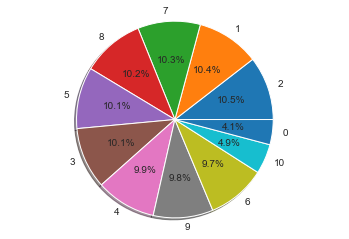

In [56]:
labels=d.index
sizes=d.values

plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')

### Observation:
 Only 4.9% customers have tenure 10 years and only 4.1% customers have tenure 0 years.

 Two year tenure have highest 10.5% customers.

<AxesSubplot:xlabel='Tenure', ylabel='count'>

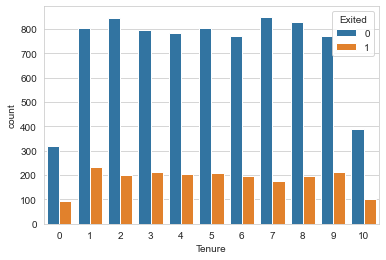

In [57]:
sns.countplot(data=df_catagorical, x='Tenure', hue='Exited')

### Observation:

 Tenure feature is not helpful in understanding data.

# Mean, Median, Percentile

In [58]:
stayed=df[df['Exited']==0]
#pick those rows which have exited column=0
left=df[df['Exited']==1]
#these are people who have churned

stayed

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [59]:
left

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


#### Here we have separated data of customers who have left from data of customers who have stayed. Now we will compare mean, median, standard deviation of stayed with that of left using different features.

## 1. Credit Score

In [60]:
# Mean, Mdian, Std-deviation
print("Mean for CreditScore:")
print(np.mean(stayed['CreditScore']), "for stayed")
print(np.mean(left['CreditScore']), "for left" )

print("\nMedian for CreditScore:")
print(np.median(stayed['CreditScore']), "for stayed")
print(np.median(left['CreditScore']), "for left")

print("\nStd-dev for CreditScore:")
print(np.std(stayed['CreditScore']), "for stayed")
print(np.std(left['CreditScore']), "for left")

Mean for CreditScore:
651.8531960316463 for stayed
645.3514972999509 for left

Median for CreditScore:
653.0 for stayed
646.0 for left

Std-dev for CreditScore:
95.64783071535247 for stayed
100.29687481012597 for left


## 2. Age

In [61]:
# Mean, Mdian, Std-deviation
print("Mean for Age:")
print(np.mean(stayed['Age']), "for stayed")
print(np.mean(left['Age']), "for left" )

print("\nMedian for Age:")
print(np.median(stayed['Age']), "for stayed")
print(np.median(left['Age']), "for left")

print("\nStd-dev for Age:")
print(np.std(stayed['Age']), "for stayed")
print(np.std(left['Age']), "for left")

Mean for Age:
37.40838879819164 for stayed
44.8379970544919 for left

Median for Age:
36.0 for stayed
45.0 for left

Std-dev for Age:
10.124727115441777 for stayed
9.759165198147958 for left


## 3. Balance

In [62]:
# Mean, Mdian, Std-deviation
print("Mean for Balance:")
print(np.mean(stayed['Balance']), "for stayed")
print(np.mean(left['Balance']), "for left" )

print("\nMedian for Balance:")
print(np.median(stayed['Balance']), "for stayed")
print(np.median(left['Balance']), "for left")

print("\nStd-dev for Balance:")
print(np.std(stayed['Balance']), "for stayed")
print(np.std(left['Balance']), "for left")

Mean for Balance:
72745.29677885193 for stayed
91108.53933726063 for left

Median for Balance:
92072.68 for stayed
109349.29 for left

Std-dev for Balance:
62844.094322747915 for stayed
58346.467874478956 for left


### Observation:
Here we can see that there is noticeable difference between mean and median of Balance. It shows that there are some outliers.

## 4. Estimated Salary

In [63]:
# Mean, Mdian, Std-deviation
print("Mean for EstimatedSalary:")
print(np.mean(stayed['EstimatedSalary']), "for stayed")
print(np.mean(left['EstimatedSalary']), "for left" )

print("\nMedian for EstimatedSalary:")
print(np.median(stayed['EstimatedSalary']), "for stayed")
print(np.median(left['EstimatedSalary']), "for left")

print("\nStd-dev for EstimatedSalary:")
print(np.std(stayed['EstimatedSalary']), "for stayed")
print(np.std(left['EstimatedSalary']), "for left")

Mean for EstimatedSalary:
99738.39177194514 for stayed
101465.6775306824 for left

Median for EstimatedSalary:
99645.04 for stayed
102460.84 for left

Std-dev for EstimatedSalary:
57401.982332801934 for stayed
57898.201201044954 for left


#  Data Pre-processing:

## One Hot Encoding for Categorical features

In one hot encoding we are converting the categorical data into numeric data to help understand the data properly to the
 
 machine.As a machine can only understand numbers and cannot understand the text in the first place, this essentially becomes 
 
 the case with Deep Learning & Machine Learning algorithms. 

In [64]:
catagorical= ['Geography','Gender']
df_catagorical= pd.get_dummies(df_catagorical, columns=catagorical, drop_first=False)
df_catagorical

,NumOfProducts,HasCrCard,IsActiveMember,Tenure,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,1,1,2,1,1,0,0,1,0
1,1,0,1,1,0,0,0,1,1,0
2,3,1,0,8,1,1,0,0,1,0
3,2,0,0,1,0,1,0,0,1,0
4,1,1,1,2,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,2,1,0,5,0,1,0,0,0,1
9996,1,1,1,10,0,1,0,0,0,1
9997,1,0,1,7,1,1,0,0,1,0
9998,2,1,0,3,1,0,1,0,0,1


### Observation:

By one hot encoding our number of features have increased and that will make our data of too many dimensions.

And to minimise the number of columns(features) we Adjusted the data in a way that , where Male and female were 2 columns we 

diducted into 1 (Gender_male) and 0 (Gender_Female). which tales us the customer is male or not that will ultimately tell you 

that if customer is not male then she's female.
 
 

# Scaling for Numerical Features:

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.

Here we have used MinMaxScaler(Data Normalisation) for preprocessing of numerical features to bring all featues in comparable 

range.

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
cs=scaling.fit_transform(df_numerical[['CreditScore']])
Age=scaling.fit_transform(df_numerical[['Age']])
Balance=scaling.fit_transform(df_numerical[['Balance']])
EstimatedSalary=scaling.fit_transform(df_numerical[['EstimatedSalary']])

df_numerical['CreditScore']= cs

df_numerical['Age']= Age

df_numerical['Balance']= Balance

df_numerical['EstimatedSalary']= EstimatedSalary

In [66]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,0.538,0.324324,0.000000,0.506735,1
1,0.516,0.310811,0.334031,0.562709,0
2,0.304,0.324324,0.636357,0.569654,1
3,0.698,0.283784,0.000000,0.469120,0
4,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341,0
9996,0.332,0.229730,0.228657,0.508490,0
9997,0.718,0.243243,0.000000,0.210390,1
9998,0.844,0.324324,0.299226,0.464429,1


#### As we have done preprocessing of both Numerical as well as Categorical features, we will now joined back all the features and class label for training of a model.

In [67]:
# Here we are dropping the Exited column, because Numerical data also contains Exited column.
df_catagorical
df_catagorical2= df_catagorical.drop("Exited",axis=1)
df_catagorical2

,NumOfProducts,HasCrCard,IsActiveMember,Tenure,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,1,1,2,1,0,0,1,0
1,1,0,1,1,0,0,1,1,0
2,3,1,0,8,1,0,0,1,0
3,2,0,0,1,1,0,0,1,0
4,1,1,1,2,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
9995,2,1,0,5,1,0,0,0,1
9996,1,1,1,10,1,0,0,0,1
9997,1,0,1,7,1,0,0,1,0
9998,2,1,0,3,0,1,0,0,1


In [68]:
# Concatination of Numerical and categorical dataframes.
df_concat2 = pd.concat([df_catagorical2,df_numerical], axis=1)

df_concat2

,NumOfProducts,HasCrCard,IsActiveMember,Tenure,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Balance,EstimatedSalary,Exited
0,1,1,1,2,1,0,0,1,0,0.538,0.324324,0.000000,0.506735,1
1,1,0,1,1,0,0,1,1,0,0.516,0.310811,0.334031,0.562709,0
2,3,1,0,8,1,0,0,1,0,0.304,0.324324,0.636357,0.569654,1
3,2,0,0,1,1,0,0,1,0,0.698,0.283784,0.000000,0.469120,0
4,1,1,1,2,0,0,1,1,0,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,1,0,5,1,0,0,0,1,0.842,0.283784,0.000000,0.481341,0
9996,1,1,1,10,1,0,0,0,1,0.332,0.229730,0.228657,0.508490,0
9997,1,0,1,7,1,0,0,1,0,0.718,0.243243,0.000000,0.210390,1
9998,2,1,0,3,0,1,0,0,1,0.844,0.324324,0.299226,0.464429,1


### Separation of features from Class label:
Here we are separating first 13 columns i.e. our features from 14th column i.e. our class label.

In [69]:
X=df_concat2.iloc[:,0:13]
X

,NumOfProducts,HasCrCard,IsActiveMember,Tenure,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Balance,EstimatedSalary
0,1,1,1,2,1,0,0,1,0,0.538,0.324324,0.000000,0.506735
1,1,0,1,1,0,0,1,1,0,0.516,0.310811,0.334031,0.562709
2,3,1,0,8,1,0,0,1,0,0.304,0.324324,0.636357,0.569654
3,2,0,0,1,1,0,0,1,0,0.698,0.283784,0.000000,0.469120
4,1,1,1,2,0,0,1,1,0,1.000,0.337838,0.500246,0.395400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,1,0,5,1,0,0,0,1,0.842,0.283784,0.000000,0.481341
9996,1,1,1,10,1,0,0,0,1,0.332,0.229730,0.228657,0.508490
9997,1,0,1,7,1,0,0,1,0,0.718,0.243243,0.000000,0.210390
9998,2,1,0,3,0,1,0,0,1,0.844,0.324324,0.299226,0.464429


In [70]:
Y=df_concat2.iloc[:,13:]
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [71]:
# Train-Test Split
# Spliting the data into train and test
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=42)

In [72]:
X_train.shape

(8000, 13)

In [73]:
X_test.shape

(2000, 13)

In [74]:
Y_train.shape

(8000, 1)

In [75]:
Y_test.shape

(2000, 1)

#  Modelling:

A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of 

data, providing it an algorithm that it can use to reason over and learn from those data.

we are using machine learning to solve the customer churn problem. There are several ways to formulate the task.

## 1. KNN(K-NEAREST NEIGHBOUR)

KNN is nearest neighbour blongs tosame class.

We will apply KNN to our data and then we will check its performance.

In [76]:
# Applying KNN

# KNN(k nearest neighbour)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create KNN classifier

hyper_parameter_k=[{'n_neighbors':[3,5,7,9]}]
clf= KNeighborsClassifier()
modelknn=GridSearchCV( clf,hyper_parameter_k,scoring='accuracy')

modelknn.fit(X_train,Y_train)

print(modelknn.best_estimator_)
# Fit the classifier to the data

KNeighborsClassifier(n_neighbors=7)


In [77]:
#Predictions
knn_train_predictions=modelknn.predict(X_train) #Y_pred_train
knn_test_prediction=modelknn.predict(X_test)    #Y_pred_test

In [78]:
# Evaluation:


# Confusion matrix:

#Training confusion matrix for KNN

from sklearn.metrics import confusion_matrix
x_knn_cf_train=confusion_matrix(Y_train,knn_train_predictions)
print(x_knn_cf_train)

[[6147  209]
 [1010  634]]


Train confusion matrix


<AxesSubplot:>

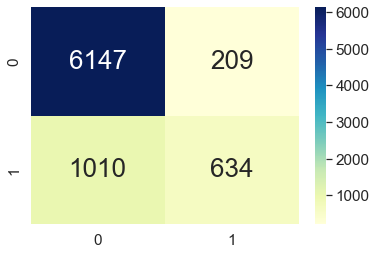

In [79]:
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_knn_cf_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [80]:
# Testing confusion matrix for KNN

from sklearn.metrics import confusion_matrix
x_knn_cf=confusion_matrix(Y_test,knn_test_prediction)
print(x_knn_cf)

[[1538   69]
 [ 298   95]]


Test confusion matrix


<AxesSubplot:>

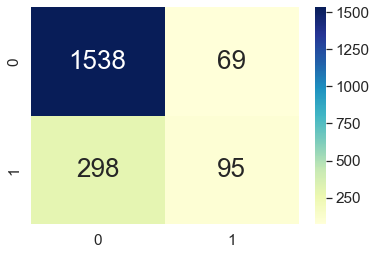

In [81]:
print("Test confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_knn_cf, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [82]:
# Precison for KNN

# Training data

from sklearn.metrics import precision_score
x_knn_p=precision_score(Y_train,knn_train_predictions)
print("The precision of x_knn_p for training data",x_knn_p)

# Testing data

from sklearn.metrics import precision_score
x_knn_p_test=precision_score(Y_test,knn_test_prediction)
print("The precision of x_knn_p for testing data",x_knn_p_test)

The precision of x_knn_p for training data 0.7520759193357058
The precision of x_knn_p for testing data 0.5792682926829268


In [83]:
#RECALL for KNN

#Training data

from sklearn.metrics import recall_score
x_knn_r_train=recall_score(Y_train,knn_train_predictions)
print("The recall of training data for knn is",x_knn_r_train)

#Test data

from sklearn.metrics import recall_score
x_knn_r_test=recall_score(Y_test,knn_test_prediction)
print("The recall of test data for knn is",x_knn_r_test)


The recall of training data for knn is 0.38564476885644766
The recall of test data for knn is 0.24173027989821882


In [84]:
# F1 Score for KNN

from sklearn.metrics import f1_score

X_knntrain_F1score=f1_score(Y_train,knn_train_predictions)
print("Training f1 score is",X_knntrain_F1score) #f1 score on train data

X_knntest_F1score=f1_score(Y_test,knn_test_prediction)
print("Testing f1 score is",X_knntest_F1score) #f1 score on test data


Training f1 score is 0.5098512263771612
Testing f1 score is 0.34111310592459604


In [85]:
# Accuracy for KNN

from sklearn.metrics import accuracy_score
a=accuracy_score(Y_train,knn_train_predictions)

print("training accuracy is",a)

from sklearn.metrics import accuracy_score
b=accuracy_score(Y_test,knn_test_prediction)

print("testing accuracy is",b)

training accuracy is 0.847625
testing accuracy is 0.8165


## 2. Logistic Regression
Logistic Regression is a Classification model. It helps to make predictions where the output variable is categorical.

In [86]:
# We are using simple GridSearchCV to tune the hyperparameter C.
# Here we are not using smote samples.

tuned_parameters=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]

LRmodel=GridSearchCV(LogisticRegression(max_iter=400,class_weight='balanced'),tuned_parameters)

LRmodel.fit(X_train,Y_train)

print(LRmodel.best_estimator_)
print("Training Accuracy:",LRmodel.score(X_train,Y_train))
print("Testing Accuracy:",LRmodel.score(X_test,Y_test))

#this is accuracy 

LogisticRegression(C=100, class_weight='balanced', max_iter=400)
Training Accuracy: 0.70775
Testing Accuracy: 0.7195


In [87]:
# Prediction
LR_predictions_train=LRmodel.predict(X_train)
LR_predictions_test=LRmodel.predict(X_test)

In [88]:
# Evaluation

# Confusion Matrix

# Training Confusion Matrix for Logistic Regression

x_LRmodel_train=confusion_matrix(Y_train,LR_predictions_train)
print(x_LRmodel_train)

[[4528 1828]
 [ 510 1134]]


Train confusion matrix for Logistic Regression


<AxesSubplot:>

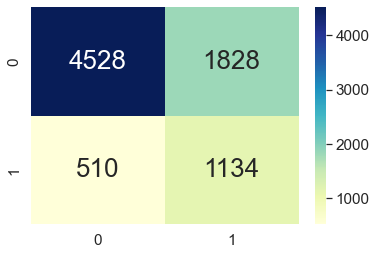

In [89]:
print("Train confusion matrix for Logistic Regression")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_LRmodel_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [90]:
# Testing Confusion Matrix for Logistic Regression

x_LRmodel_test=confusion_matrix(Y_test,LR_predictions_test)
print(x_LRmodel_test)

[[1159  448]
 [ 113  280]]


Test confusion matrix for Logistic Regression


<AxesSubplot:>

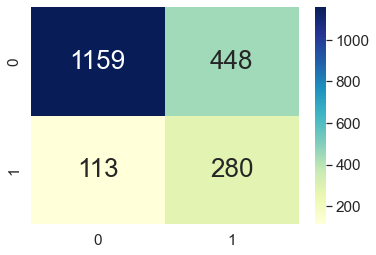

In [91]:
print("Test confusion matrix for Logistic Regression")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_LRmodel_test, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [92]:
# Precison for Logistic Regression

# Training data

x_LRmodel_p_train=precision_score(Y_train,LR_predictions_train)
print("The precision of x_LRmodel_p_train for training data",x_LRmodel_p_train)

# Testing data

x_LRmodel_p_test=precision_score(Y_test,LR_predictions_test)
print("The precision of x_LRmodel_p_test for testing data",x_LRmodel_p_test)

The precision of x_LRmodel_p_train for training data 0.3828494260634706
The precision of x_LRmodel_p_test for testing data 0.38461538461538464


In [93]:
#RECALL for Logistic Regression

#Training data

x_LRmodel_r_train=recall_score(Y_train,LR_predictions_train)
print("The recall of training data for Logistic Regression is",x_LRmodel_r_train)

#Test data

x_LRmodel_r_test=recall_score(Y_test,LR_predictions_test)
print("The recall of test data for Logistic Regression is",x_LRmodel_r_test)

The recall of training data for Logistic Regression is 0.6897810218978102
The recall of test data for Logistic Regression is 0.712468193384224


In [94]:
# F1 Score for Logistic Regression

X_LRmodel_F1score_train=f1_score(Y_train,LR_predictions_train)
print("Training f1 score for Logistic Regression is",X_LRmodel_F1score_train) #f1 score on train data

X_LRmodel_F1score_test=f1_score(Y_test,LR_predictions_test)
print("Testing f1 score for Logistic Regression is",X_LRmodel_F1score_test) #f1 score on test data


Training f1 score for Logistic Regression is 0.49240121580547114
Testing f1 score for Logistic Regression is 0.49955396966993754


## 3. SVM( SUPPORT VECTOR MACHINE

Support Vector Machine” (SVM) is a supervised machine learning algorithm that can be used for both classification or regression

challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in 

n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular 

coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.To finding 

best fit line .


In [96]:
#svm(support vector machine)
from sklearn import svm
tuned_parameters=[{'C':[0.001, 0.01, 0.1, 1, 10]}]
clf= svm.SVC(kernel='rbf')
SVMmodel=GridSearchCV(clf,tuned_parameters,cv=3)

SVMmodel.fit(X_train,Y_train)

print(SVMmodel.best_estimator_)
print("Training Accuracy using SVM:",SVMmodel.score(X_train,Y_train))
print("Testing Accuracy using SVM:",SVMmodel.score(X_test,Y_test))
# Fit the classifier to the data

SVC(C=10)
Training Accuracy using SVM: 0.826125
Testing Accuracy using SVM: 0.83


In [97]:
# Prediction
SVM_predictions_train=SVMmodel.predict(X_train)
SVM_predictions_test=SVMmodel.predict(X_test)

In [98]:
# Evaluation

# Confusion Matrix

# Training Confusion Matrix for SVM

x_SVM_train=confusion_matrix(Y_train,SVM_predictions_train)
print(x_SVM_train)

[[6314   42]
 [1349  295]]


Train confusion matrix for SVM


<AxesSubplot:>

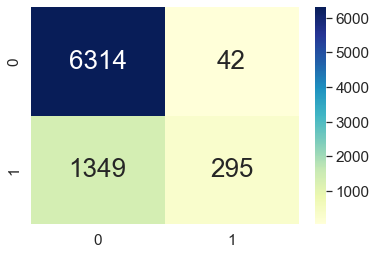

In [99]:
print("Train confusion matrix for SVM")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_SVM_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [100]:
# Testing Confusion Matrix for Logistic Regression

x_SVM_test=confusion_matrix(Y_test,SVM_predictions_test)
print(x_SVM_test)

[[1591   16]
 [ 324   69]]


Test confusion matrix for SVM


<AxesSubplot:>

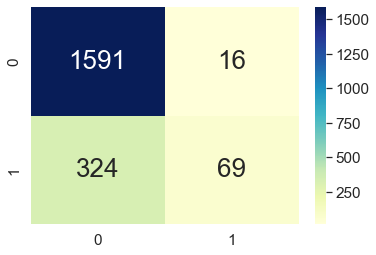

In [101]:
print("Test confusion matrix for SVM")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_SVM_test, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [102]:
# Precison for SVM

# Training data

x_SVM_p_train=precision_score(Y_train,SVM_predictions_train)
print("The precision of x_SVM_p_train for training data",x_SVM_p_train)

# Testing data

x_SVM_p_test=precision_score(Y_test,SVM_predictions_test)
print("The precision of x_SVM_p_test for testing data",x_SVM_p_test)

The precision of x_SVM_p_train for training data 0.8753709198813057
The precision of x_SVM_p_test for testing data 0.8117647058823529


In [103]:
#RECALL for SVM

#Training data

x_SVM_r_train=recall_score(Y_train,SVM_predictions_train)
print("The recall of training data for SVM is",x_SVM_r_train)

#Test data

x_SVM_r_test=recall_score(Y_test,SVM_predictions_test)
print("The recall of test data for SVM is",x_SVM_r_test)

The recall of training data for SVM is 0.1794403892944039
The recall of test data for SVM is 0.17557251908396945


In [104]:
# F1 Score for Logistic Regression

X_SVM_F1score_train=f1_score(Y_train,SVM_predictions_train)
print("Training f1 score for SVM is",X_SVM_F1score_train) #f1 score on train data

X_SVM_F1score_test=f1_score(Y_test,SVM_predictions_test)
print("Testing f1 score for SVM is",X_SVM_F1score_test) #f1 score on test data


Training f1 score for SVM is 0.2978293791014639
Testing f1 score for SVM is 0.28870292887029286


## 4. Decision Tree

A Decision Tree is a supervised learning algorithm. It is a graphical representation of all the possible solutions. 

All the decisions were made based on some conditions.

In [105]:
from sklearn import tree
tuned_parameters=[{'max_depth':[4,5,6]}]

clf = tree.DecisionTreeClassifier(min_samples_split=5,random_state=42)


DTmodel=GridSearchCV(clf,tuned_parameters)

DTmodel.fit(X_train,Y_train)

print(DTmodel.best_estimator_)
print("Training Accuracy using Decision Tree:",DTmodel.score(X_train,Y_train))
print("Training Accuracy using Decision Tree:",DTmodel.score(X_test,Y_test))

DecisionTreeClassifier(max_depth=6, min_samples_split=5, random_state=42)
Training Accuracy using Decision Tree: 0.865875
Training Accuracy using Decision Tree: 0.8595


In [106]:
# Prediction

DT_predictions_train=DTmodel.predict(X_train)
DT_predictions_test=DTmodel.predict(X_test)

In [107]:
# Evaluation

# Confusion Matrix

# Training Confusion Matrix for Decision Tree

x_DT_train=confusion_matrix(Y_train,DT_predictions_train)
print(x_DT_train)

[[6146  210]
 [ 863  781]]


Train confusion matrix for Decision Tree


<AxesSubplot:>

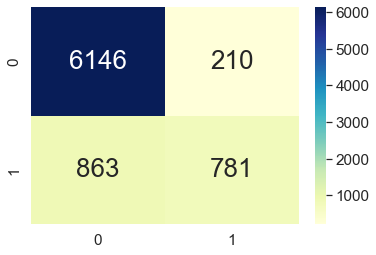

In [108]:
print("Train confusion matrix for Decision Tree")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_DT_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [109]:
# Testing Confusion Matrix for Decision Tree

x_DT_test=confusion_matrix(Y_test,DT_predictions_test)
print(x_DT_test)

[[1542   65]
 [ 216  177]]


Test confusion matrix for Decision Tree


<AxesSubplot:>

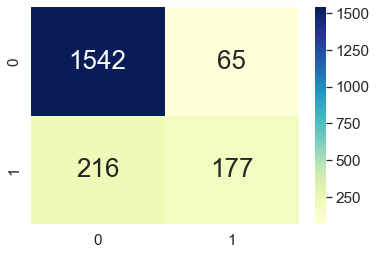

In [110]:
print("Test confusion matrix for Decision Tree")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_DT_test, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [111]:
# Precison for Decision tree

# Training data

x_DT_p_train=precision_score(Y_train,DT_predictions_train)
print("The precision of x_DT_p_train for training data",x_DT_p_train)

# Testing data

x_DT_p_test=precision_score(Y_test,DT_predictions_test)
print("The precision of x_DT_p_test for testing data",x_DT_p_test)

The precision of x_DT_p_train for training data 0.7880928355196771
The precision of x_DT_p_test for testing data 0.731404958677686


In [112]:
#RECALL for Decision Tree

#Training data

x_DT_r_train=recall_score(Y_train,DT_predictions_train)
print("The recall of training data for Decision Tree is",x_DT_r_train)

#Test data

x_DT_r_test=recall_score(Y_test,DT_predictions_test)
print("The recall of test data for Decision Tree is",x_DT_r_test)

The recall of training data for Decision Tree is 0.4750608272506083
The recall of test data for Decision Tree is 0.45038167938931295


In [113]:
# F1 Score for Decision Tree

X_DT_F1score_train=f1_score(Y_train,DT_predictions_train)
print("Training f1 score for Decision Tree is",X_DT_F1score_train) #f1 score on train data

X_DT_F1score_test=f1_score(Y_test,DT_predictions_test)
print("Testing f1 score for Decision Tree is",X_DT_F1score_test) #f1 score on test data


Training f1 score for Decision Tree is 0.5927893738140418
Testing f1 score for Decision Tree is 0.5574803149606299


## 5. Random Forest

Random Forest is an ensemble algorithm that follows the bagging approach. The Decision Tree is the base estimator for a Random

Forest. As the name suggests, a forest is a group of many trees, and a random forest is a set of various Decision Trees. 

Random Forest selects a feature set randomly to choose the best split at each decision tree node.

In [114]:
#Training random forest after applying SMOTE technique.
#here we are using GridSearchCV to tune the hyperparamters we have in randomforest to see which 
# parameters works best.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200,300, 500],
    'max_depth' : [4,5,6]
}
rfc=RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

In [115]:
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

{'max_depth': 6, 'n_estimators': 500}


In [116]:
#training the random forest model
rfc_new=RandomForestClassifier(criterion= 'entropy', max_depth= 6, max_features= 'auto', n_estimators=500,random_state=42)
random_forest_model=rfc_new.fit(X_train,Y_train)

In [117]:
#predictions
RF_predictions_train=random_forest_model.predict(X_train)
RF_predictions_test=random_forest_model.predict(X_test)

In [118]:
# Evaluation

# Confusion Matrix

# Training Confusion Matrix for Random Forest

x_RF_train=confusion_matrix(Y_train,RF_predictions_train)
print(x_RF_train)

[[6298   58]
 [1072  572]]


Train confusion matrix for Random Forest


<AxesSubplot:>

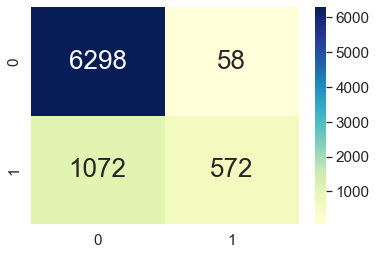

In [119]:
print("Train confusion matrix for Random Forest")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_RF_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [120]:
# Testing Confusion Matrix for Random Forest

x_RF_test=confusion_matrix(Y_test,RF_predictions_test)
print(x_RF_test)

[[1588   19]
 [ 272  121]]


Test confusion matrix for Random Forest


<AxesSubplot:>

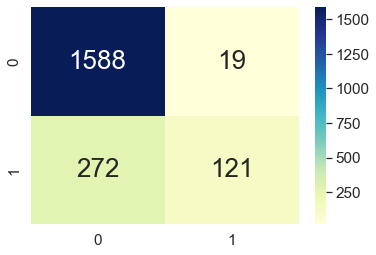

In [121]:
print("Test confusion matrix for Random Forest")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_RF_test, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [122]:
# Precison for Random Forest

# Training data

x_RF_p_train=precision_score(Y_train,RF_predictions_train)
print("The precision of x_RF_p_train for training data",x_RF_p_train)

# Testing data

x_RF_p_test=precision_score(Y_test,RF_predictions_test)
print("The precision of x_RF_p_test for testing data",x_RF_p_test)

The precision of x_RF_p_train for training data 0.9079365079365079
The precision of x_RF_p_test for testing data 0.8642857142857143


In [123]:
#RECALL for Random Forest

#Training data

x_RF_r_train=recall_score(Y_train,RF_predictions_train)
print("The recall of training data for Random Forest is",x_RF_r_train)

#Test data

x_RF_r_test=recall_score(Y_test,RF_predictions_test)
print("The recall of test data for Random Forest is",x_RF_r_test)

The recall of training data for Random Forest is 0.34793187347931875
The recall of test data for Random Forest is 0.30788804071246817


In [124]:
# F1 Score for Random Forest

X_RF_F1score_train=f1_score(Y_train,RF_predictions_train)
print("Training f1 score for Random Forest is",X_RF_F1score_train) #f1 score on train data

X_RF_F1score_test=f1_score(Y_test,RF_predictions_test)
print("Testing f1 score for Random Forest is",X_RF_F1score_test) #f1 score on test data


Training f1 score for Random Forest is 0.5030782761653474
Testing f1 score for Random Forest is 0.45403377110694176


In [125]:
# Accuracy for Random Forest

a=accuracy_score(Y_train,RF_predictions_train)

print("training accuracy is",a)

b=accuracy_score(Y_test,RF_predictions_test)

print("testing accuracy is",b)

training accuracy is 0.85875
testing accuracy is 0.8545


In [126]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [127]:
from prettytable import PrettyTable
columns=(["ALGORITHM", "ACCURACY","PRECISION","RECALL","F1"])
myTable = PrettyTable()
myTable.add_column(columns[0], ["KNN","Logistic Regression","SVM", "DECISION TREE" ,"Random Forest"])
myTable.add_column(columns[1], ["81.65%","72.00%","83.00%","86.00%","85.45%"])
myTable.add_column(columns[2], ["58.00%","38.46%","81.17%","73.14%","86.42%"])
myTable.add_column(columns[3], ["24.17%","71.20%","17.55%","45.03%","30.78%"])
myTable.add_column(columns[4], ["34.11%","50.00%","28.87%","55.75%","45.40%"])

print(myTable)


+---------------------+----------+-----------+--------+--------+
|      ALGORITHM      | ACCURACY | PRECISION | RECALL |   F1   |
+---------------------+----------+-----------+--------+--------+
|         KNN         |  81.65%  |   58.00%  | 24.17% | 34.11% |
| Logistic Regression |  72.00%  |   38.46%  | 71.20% | 50.00% |
|         SVM         |  83.00%  |   81.17%  | 17.55% | 28.87% |
|    DECISION TREE    |  86.00%  |   73.14%  | 45.03% | 55.75% |
|    Random Forest    |  85.45%  |   86.42%  | 30.78% | 45.40% |
+---------------------+----------+-----------+--------+--------+


# Conclusion of the Project:

we have walked through a complete end-to-end machine learning project using the bank customer Churn dataset.

We started by cleaning the data and analyzing it with visualization.

Then, to be able to build a machine learning model, we transformed the categorical data into numeric variables 
(feature engineering).

After transforming the data, we tried five different machine learning algorithms using default parameters.

Finally, we tuned the hyperparameters of the Decision Tree is giving the best accuracy and f1 score.

Also, training accuracy and testing accuracy of Decision Tree is close and high.

So we can use this algorithm for the production.